## All libs which are used:

In [233]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, ButtonStyle, Button, Layout, VBox
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML

### Sine function, rectangle integral and Gaussian's distribution calcs:

In [234]:
 def f(t): 
    
    if type(t) == int or type(t) == float:
        if t >= 0 and t <= 2*np.pi:
            return np.sin(t - np.pi/2) + 1
        elif t >= 2*np.pi:
            return 0
        
    else:
        result = [np.sin(i - np.pi/2) + 1 if i >= 0 and i <= 2*np.pi else 0 for i in t]
        return result
    
    
def rectangle_integral(f, points, delta, lag_obj):
    result = np.array([np.sum(np.multiply(f(points), lag_obj.laguerre_func(n = k, t = points)) * np.e**(-(lag_obj.alpha)*points) * delta) for k in range(lag_obj.N + 1)])
    return result


def haus_distribution(t, mu = 30, lamb = 10):
        result = (1 / (lamb * np.sqrt(2 * np.pi))) * np.exp(-(np.power((t - mu), 2)) / (2 * np.power(lamb, 2)))
        return result


## Main class "Laguerre"

In [235]:
class Laguerre:

    def __init__(self,beta, sigma, number_of_points, eps, T,N):
        self.beta = beta
        self.sigma = sigma
        self.number_of_points = number_of_points
        self.eps = eps
        self.T = T
        self.N = N
        self.alpha = self.sigma - self.beta

    
    def check_type(self, t):
        if type(t) == int or type(t) == float:
            return t
        else:
            return t.any()
        
    def laguerre_func(self, t, n):  
        
        if self.check_type(t) < 0 and n < 0:
            return print("You entered incorrect data.")
        
        laguerre_result_0 = np.sqrt(self.sigma) * np.exp(t * (-self.beta / 2))
        laguerre_result_1 = laguerre_result_0 * (1 - t * self.sigma)

        if n == 0:
            return laguerre_result_0
        elif n == 1:
            return laguerre_result_1
        else:
            for i in range(2, n+1):
                laguerre_result_n = ((2 * i - 1 - t * self.sigma) / i) * laguerre_result_1 - ((i - 1) / i) * laguerre_result_0
                laguerre_result_0 = laguerre_result_1
                laguerre_result_1 = laguerre_result_n
            return laguerre_result_n

    def laguerre_tabulation(self, t, n):
        laguerre_result_0 = self.laguerre_func(t, 0)
        laguerre_result_1 = self.laguerre_func(t, 1)
        list_of_lag = [laguerre_result_0, laguerre_result_1]
        list_of_t_values = [i for i in range(0,t+1)]
        for i in range(2, t+1):
            laguerre_result_n = self.laguerre_func(t, i)
            laguerre_result_0 = laguerre_result_1
            laguerre_result_1 = laguerre_result_n
            list_of_lag.append(laguerre_result_n)
        return list_of_lag, list_of_t_values

#             C# another func
    def function_graph(self, fun, a, b, n,number_of_points):
        fig = plt.figure(figsize=(7, 5))
        ax = fig.gca()

        x = np.linspace(a, b, number_of_points)

        for i in range(n):
            y = np.array([func_val for func_val in self.laguerre_func(x, i)])
            ax.plot(x, y)

        ax.axhline(color='grey')
        ax.axvline(color='grey')
        ax.set_xlim(a, b)
        ax.set_xlabel('x')
        ax.set_ylabel('lag_func(x)')
        ax.grid()
        plt.show()
    
    def transformation(self, func):
        number_of_points = self.number_of_points
        delt = (self.T) / (number_of_points - 1)
        half_delta = delt / 2
        ponts = np.linspace(0 + half_delta, self.T - half_delta, number_of_points - 1)
        res_0 = np.array([0] * (self.N+1))
        res_1 = rectangle_integral(f = func, points = ponts, delta = delt, lag_obj = self)
            
        while ((np.abs(res_0 - res_1)) > self.eps).any():
            res_0 = res_1
            number_of_points *= 2
            delta_ = (self.T) / (number_of_points - 1)
            half_delta = delta_ / 2
            points_ = np.linspace(0 + half_delta, self.T - half_delta, number_of_points - 1)
            res_1 = rectangle_integral(f = func, points = ponts, delta = delt, lag_obj = self)
            
        return res_1 

            
        
    def inverse_Laguerre_transformation(self, t, func = f):
        seq = self.transformation(f)
        lag = [self.laguerre_func(t, i) for i in range(len(seq))]
        h = sum(seq * lag)
        
        return h
    
    
    def haus_distribution(self, mu=30, lamb=10):
        numerator = np.exp(-np.power(self.T - mu, 2) / (2 * np.power(lamb, 2)))
        denominator = lamb * np.sqrt(2 * np.pi)

        return numerator / denominator

    
    def inverse_haus(self, t, func = haus_distribution):
        seq = self.transformation(haus_distribution)
        lag = [self.laguerre_func(t, i) for i in range(len(seq))]
        h = sum(seq * lag)
        
        return h
    

# UI/UX widgets part (default laguerre) 


In [242]:
t1, n1, beta1, sigma1, fun1, a1, b1, number_of_points1, eps1, T1, N1 = 5, 5, 2, 4, f, 0, 20, 100, 0.01, 15, 20

t = widgets.IntText(description="t", value=t1, min=0, max=50)
beta = widgets.FloatText(description="beta", value=beta1, min=0, max=20)
sigma = widgets.FloatText(description="sigma", value=sigma1, min=beta, max=20)
N = widgets.IntSlider(description="N", value=N1, min=0, max=50)
n = widgets.IntSlider(description="n", value=n1, min=0, max=N.value)
a = widgets.FloatText(description="a", value=a1, min=-100, max=99)
b = widgets.FloatText(description="b", value=b1, min=-99, max=100)
T = widgets.FloatText(description="T", value=T1, min=0, max=100)
number_of_points = widgets.IntText(description="points", value=number_of_points1, min=200, max=3000, step=50)
eps = widgets.FloatText(description="eps", value=eps1, min=0, max=1, step=0.001)

t.layout = widgets.Layout(width="150px")
t.style.description_width = "50px"
t.style.handle_color = "green"

beta.layout = widgets.Layout(width="150px")
beta.style.description_width = "50px"
beta.style.handle_color = "green"

sigma.layout = widgets.Layout(width="150px")
sigma.style.description_width = "50px"
sigma.style.handle_color = "green"

N.layout = widgets.Layout(width="250px")
N.style.handle_color = "green"

n.layout = widgets.Layout(width="250px")
n.style.handle_color = "green"

a.layout = widgets.Layout(width="150px")
a.style.description_width = "50px"
a.style.handle_color = "orange"

b.layout = widgets.Layout(width="150px")
b.style.description_width = "50px"
b.style.handle_color = "orange"

T.layout = widgets.Layout(width="150px")
T.style.description_width = "50px"
T.style.handle_color = "orange"

number_of_points.layout = widgets.Layout(width="150px")
number_of_points.style.description_width = "70px"
number_of_points.style.handle_color = "orange"

eps.layout = widgets.Layout(width="150px")
eps.style.description_width = "50px"
eps.style.handle_color = "orange"

inputs_label = widgets.HTML("<h3>Choose the parameters</h3>")
inputs_container = widgets.VBox([inputs_label, t, beta, sigma, T, eps, N, n, number_of_points, a, b])
inputs_container.layout.justify_content = "space-between"
inputs_container.layout.align_items = "flex-start"
inputs_container.layout.padding = "10px"
inputs_container.layout.border = "12px solid green"

output_label = widgets.HTML("<h3>Result with your parameters</h3>")
output = widgets.Output()

output.layout.padding = "10px"
output.layout.border = "12px solid orange"


def init_laguerre(t, beta, sigma, T, number_of_points, eps, N, n, a, b):
    with output:
        lag = Laguerre(beta, sigma, number_of_points, eps, T,N)
        func = lag.laguerre_tabulation(t,n)
        lag.function_graph(func, a, b, n, number_of_points)
        print("The result of Laguerre Polynomial with given arguments:\n",lag.laguerre_func(t,n))
        
widgets.interactive_output(init_laguerre, {'t': t, 'n': n, 'beta': beta, 'sigma': sigma, 'eps': eps, 'N': N, 'T': T, 'number_of_points': number_of_points, 'a': a, 'b': b})

display(inputs_container, output_label, output)

HTML(value='<h3>Result with your parameters</h3>')

Output(layout=Layout(border='12px solid orange', padding='10px'))

# UI/UX widgets part (inverse laguerre) 

In [238]:
def graph_for_transform_lag(lag_obj, func, N_arr, a, T=np.pi*2, num_of_pts=300):
    fig = None

    def plot_graph(_):
        nonlocal fig
        if fig is not None:
            plt.close(fig) 

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))
        t = np.linspace(a, T, num_of_pts)
        f_t = func(t)
        ax1.plot(t, f_t, 'r')
        ax1.set_title('function')
        ax1.set_xlabel('x')
        ax1.set_ylabel('f(x)')

        f_N = []
        delta = (T - a) / (num_of_pts - 1)
        t_range = np.linspace(a + delta / 2, T - delta / 2, num_of_pts - 1)
        temp_N = lag_obj.N
        for n in N_arr:
            lag_obj.N = n
            f_N.append([lag_obj.inverse_Laguerre_transformation(t_, func) for t_ in t_range])
        lag_obj.N = temp_N
        for i in range(len(N_arr)):
            ax2.plot(t_range, f_N[i], label=f'f {N_arr[i]} (x)')

        ax2.set_title('inverse Laguerre transform')
        ax2.set_xlabel('x')
        ax2.set_ylabel('f(x)')
        ax2.legend()

        plt.show()

    button = widgets.Button(description='Create Graph of inverse Laguerre')

    button.style.button_color = 'lime'
    button.style.font_weight = 'bold'

    button.layout.width = '500px'
    button.layout.margin = 'auto'

    button.on_click(plot_graph)
    display(button)

plt.close('all')
lag1 = Laguerre(2, 4, 100, 0.001, 7,20)
graph_for_transform_lag(lag1, f, [5, 20], 0)


Button(description='Create Graph of inverse Laguerre', layout=Layout(margin='auto', width='500px'), style=Butt…

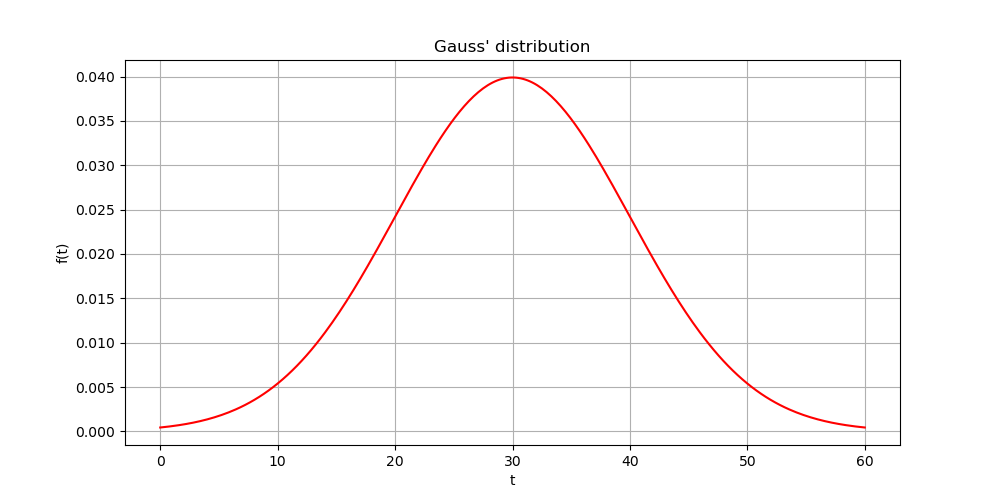

In [239]:
def graph_for_haus(a=0, T=60, num_of_pts = 300):
        fig = plt.figure(figsize=(10, 5))
        ax1 = fig.gca()
        t = np.linspace(a, T, num_of_pts)
        f_t = haus_distribution(t)

        ax1.plot(t, f_t, 'r')
        ax1.set_title('Gauss\' distribution')
        ax1.set_xlabel('t')
        ax1.set_ylabel('f(t)')
        ax1.grid(True)
        plt.show()
        
graph_for_haus()

## Calculations with C#:

In [240]:
output = widgets.Output()

def show_plot1():
    output.clear_output(wait=True)
    file = open('laguerre.csv', mode='r')

    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca()
    ax.axhline(color="grey", ls="--", zorder=-1)
    ax.axvline(color="grey", ls="--", zorder=-1)
    ax.set_title('Laguerre Functions calculated with C#')
    ax.grid(True)

    for row in file:
        row_data = list(map(float, row[:-1].split(",")))
        ax.set_xlim(0, row_data[::2][-1])
        ax.plot(row_data[::2], row_data[1::2], alpha=0.8)

    plt.show()
    file.close()

def show_plot2():
    output.clear_output(wait=True)
    file = open('laguerre_sin.csv', mode='r')
    data = file.read()
    file.close()

    d = list(map(float, data[:-1].split(",")))

    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.gca()
    ax1.axhline(color="grey", ls="--", zorder=-1)
    ax1.axvline(color="grey", ls="--", zorder=-1)
    ax1.set_title('Laguerre Inverse Transform calculated with C#')

    xs = d[::2]
    ys = d[1::2]
    ax1.grid(True)
    ax1.plot(xs, ys)

    plt.show()
    file.close()

def show_plot3():
    output.clear_output(wait=True)
    
    fig = plt.figure(figsize=(10, 5))
    ax2 = fig.gca()
    ax2.axhline(color="grey", ls="--", zorder=-1)
    ax2.axvline(color="grey", ls="--", zorder=-1)
    ax2.set_title('Gaussian Inverse Transform calculated with C#')
    
    x2, y2 = read_data("gaus.txt")
    ax2.grid(True)
    ax2.plot(x2, y2)
    
    ax2.set_xlabel('t')
    ax2.set_ylabel('f(t)')
    
    plt.show()
    
    

def wrap_btn1(_):
    output.clear_output(wait=True)
    with output:
        show_plot1()

def wrap_btn2(_):
    output.clear_output(wait=True)
    with output:
        show_plot2()
        
def wrap_btn3(_):
    output.clear_output(wait=True)
    with output:
        show_plot3()


button_style = {'description_width': 'initial','font_weight': 'bold'}
button_layout = Layout(width='460px', height='40px')
button1 = Button(description='Read Laguerre Functions calculated with C#', style=button_style, layout=button_layout)
button2 = Button(description='Read Laguerre Inverse Transform calculated with C#', style=button_style, layout=button_layout)
button3 = Button(description='Read Gaussian Inverse Transform calculated with C#', style=button_style, layout=button_layout)
button1.on_click(wrap_btn1)
button2.on_click(wrap_btn2)
button3.on_click(wrap_btn3)

button1.style.button_color = 'orange'
button2.style.button_color = 'blue'
button3.style.button_color = 'lime'

button1.add_class('hover-button')
button2.add_class('hover-button')
button3.add_class('hover-button')

hover_css = """
.hover-button:hover {
    background-color: white !important;
}
"""

hover_style = widgets.HTML("<style>{}</style>".format(hover_css))

container = VBox([button1, button2, button3, hover_style, output], layout=Layout(justify_content='center', align_items='center'))

display(container)

In [225]:
def read_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    inverse_gaussian_x = []
    inverse_gaussian_y = []

    i = 0
    while i < len(lines):
        if lines[i].strip() == 'Inverse transformation:':
            i += 1
            if lines[i].strip() == 'x gaussian inverse':
                i += 1
                while lines[i].strip() != 'y gaussian inverse':
                    inverse_gaussian_x.append(float(lines[i]))
                    i += 1
            if lines[i].strip() == 'y gaussian inverse':
                i += 1
                while lines[i].strip() != 'end.':
                    inverse_gaussian_y.append(float(lines[i]))
                    i += 1
            if lines[i].startswith('end.'):
                return np.array(inverse_gaussian_x), np.array(inverse_gaussian_y)    
        
    return np.array(inverse_gaussian_x), np.array(inverse_gaussian_y)